In [10]:
import pandas as pd
import numpy as np
import matplotlib as mt

In [ ]:
#!pip install matplotlib

In [2]:
def get_data(size = 10000):
    df = pd.DataFrame()
    df['age'] = np.random.randint(0,100,size)
    df['time_in_bed'] = np.random.randint(0, 9, size)
    df['pct_sleeeping'] = np.random.rand(size)
    df['fav_food'] = np.random.choice(['pizza','taco','ice-cream'],size)
    df['hate_food'] = np.random.choice(['brinjal','chillis','eggs'],size)
    return df

In [3]:
df = get_data()
df.head()

,age,time_in_bed,pct_sleeeping,fav_food,hate_food
0,76,7,0.274821,ice-cream,eggs
1,0,4,0.393354,taco,eggs
2,59,7,0.738269,taco,chillis
3,27,4,0.180645,taco,brinjal
4,34,6,0.097912,ice-cream,brinjal


In [4]:
def reward_cal(row):
    if row['age'] >= 90:
        return row['fav_food']
    if (row['time_in_bed'] > 5) & (row['pct_sleeeping'] > 0.5):
        return row['fav_food']
    return row['hate_food']

## Level 1 -Loop


In [5]:
%%timeit
df = get_data()
for index,row in df.iterrows():
    df.loc[index,'reward'] = reward_cal(row)

1.61 s ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Level 2 - Apply

In [6]:
%%timeit
df = get_data()
df['reward'] = df.apply(reward_cal,axis=1)

106 ms ± 9.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Level 3 - Vectorized

In [7]:
%%timeit
df = get_data()
df['reward'] = df['hate_food']
df.loc[((df['time_in_bed'] > 5) & (df['pct_sleeeping'] > 0.5)) | (df['age'] > 90),'reward'] = df['fav_food']

df.head()

7.88 ms ± 488 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<Axes: title={'center': 'Time to run function'}, xlabel='type'>

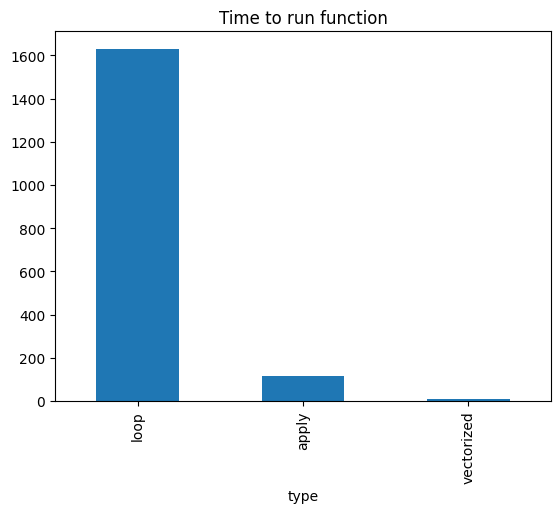

In [11]:
results = pd.DataFrame([["loop",1630,39],["apply",117,5.63],["vectorized",8.71,0.000128]],columns=["type","mean","std"])

results.set_index('type')['mean'].plot(kind='bar',title='Time to run function')